In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import random
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
%matplotlib inline

In [2]:
# Read the data into dataframe
df = pd.read_excel('OBU_unique.xlsx')
df

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,CMFCUS1_AML_BUSINESS,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,...,CMFCUS1_Q_ID,CMFCUS1_PURPOSE,CMFCUS1_DERIVATIVE,CUST_TYP,LN_TYP,CONFIRM_TYPE,CORP_TYPE,CMFCUS25_BRANCH,CHANNEL,SAR
0,0,1,0,1,0,1,0,0,0,0,...,1,E,NA_TYPE,5Z,0,1,Z,0,1,N
1,1,1,0,1,0,1,1,0,0,0,...,37,6,NA_TYPE,5Z,0,NA_TYPE,4,0,1,N
2,0,1,0,1,0,1,0,0,0,0,...,1,4,NA_TYPE,1Z,0,1,Z,0,1,N
3,0,1,0,1,0,1,0,0,0,0,...,1,C,NA_TYPE,1Z,0,1,Z,0,1,N
4,0,1,0,1,0,1,0,0,0,0,...,1,E,NA_TYPE,1Z,0,1,Z,0,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,0,1,0,1,0,1,0,0,0,0,...,1,1,NA_TYPE,1Z,0,1,Z,0,1,N
9945,0,1,0,1,0,1,0,0,0,0,...,1,E,NA_TYPE,1Z,0,NA_TYPE,4,0,1,N
9946,0,1,0,1,0,1,0,0,0,0,...,1,E,NA_TYPE,1Z,0,NA_TYPE,4,0,1,N
9947,0,1,0,1,0,1,0,0,0,0,...,1,E,NA_TYPE,1Z,0,1,Z,0,1,N


In [3]:
print(df.columns)

Index(['CMFCUS1_VIP_CODE', 'CMFCUS1_BUSINESS_FLAG', 'CMFCUS1_NOTAX_FLAG',
       'CMFCUS1_FINANCIAL_ACT', 'CMFCUS1_AML_BUSINESS', 'DP_FG', 'LN_FG',
       'IX_FG', 'BD_FG', 'FD_FG', 'WM_FG', 'TR_FG', 'EB_FG', 'CD_FG', 'OT_FG',
       'TRUST_YN', 'CONFIRM_YN', 'COMPLEX_CS_FG', 'AUTHORIZED', 'BEARER_SHARE',
       'ISSUE_BEARER', 'SOLE_CORP', 'TRUST_HOLDER', 'CUST_PANA', 'CUST_THIRD',
       'CUST_ADVRS', 'CUST_BAHA', 'CUST_PARA', 'CMFCUS25_AE_TYPE',
       'CMFCUS25_FOREIGN_COMPANY', 'CMFCUS25_FOREIGN_ENTITY',
       'CMFCUS25_CERTI_FLAG', 'CMFCUS25_TAXFREE_FLAG',
       'CMFCUS25_CREATIVE_FLAG', 'CMFCUS25_OSU_FLAG', 'CMFCUS25_PUBLIC_CMPY',
       'PEP_COUNT_THR_1', 'REL_ADVERS_COUNT_THR_1', 'REL_PEPS_COUNT_THR_1',
       'CMFCUS1_BUSINESS_CODE', 'NATION_RISK', 'AMT_RANGE',
       'OBU_ANNUAL_INCOME', 'JOB_RISK', 'CMFCUS1_ADR_CNT',
       'CMFCUS1_MPHONE_CNT', 'CMFCUS1_OPHONE_CNT', 'CMFCUS1_BIRTH_DATE',
       'CMFCUS1_Q_ID', 'CMFCUS1_PURPOSE', 'CMFCUS1_DERIVATIVE', 'CUST_TYP',
       '

In [4]:
# Preprocessing
# SAR_ALERT
df['SAR']=np.where(df['SAR']=='Y',1,0)
# Categorize
df['CHANNEL'] = df['CHANNEL'].astype(str)
df['CMFCUS1_Q_ID'] = df['CMFCUS1_Q_ID'].astype(str)
df['CMFCUS1_PURPOSE'] = df['CMFCUS1_PURPOSE'].astype(str)
df['CMFCUS1_DERIVATIVE'] = df['CMFCUS1_DERIVATIVE'].astype(str)
df['LN_TYP'] = df['LN_TYP'].astype(str)
df['CONFIRM_TYPE'] = df['CONFIRM_TYPE'].astype(str)
df['CORP_TYPE'] = df['CORP_TYPE'].astype(str)
df['CMFCUS25_BRANCH'] = df['CMFCUS25_BRANCH'].astype(str)

In [5]:
'''
from pandas_profiling import ProfileReport
profile = ProfileReport(df, explorative=True)
profile
'''

'\nfrom pandas_profiling import ProfileReport\nprofile = ProfileReport(df, explorative=True)\nprofile\n'

In [5]:
# fill NAs
df = df.fillna(value='NA_TYPE')

In [7]:
'''
df['NA_COUNT'] = 0
for i in range(len(df)):
    df.loc[i, 'NA_COUNT'] = len(np.where(df.iloc[i][:]=='NA_TYPE')[0])
df
'''

"\ndf['NA_COUNT'] = 0\nfor i in range(len(df)):\n    df.loc[i, 'NA_COUNT'] = len(np.where(df.iloc[i][:]=='NA_TYPE')[0])\ndf\n"

In [6]:
# X turn into dummies
X_dummy = df.iloc[:,:-1]
X_dummy = pd.get_dummies(X_dummy, drop_first=True)
X_dummy

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,CMFCUS1_AML_BUSINESS,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,...,CORP_TYPE_A,CORP_TYPE_NA_TYPE,CORP_TYPE_Z,CMFCUS25_BRANCH_1,CMFCUS25_BRANCH_2,CMFCUS25_BRANCH_3,CMFCUS25_BRANCH_4,CMFCUS25_BRANCH_NA_TYPE,CHANNEL_4,CHANNEL_5
0,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9945,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9946,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9947,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [7]:
X_dummy.columns

Index(['CMFCUS1_VIP_CODE', 'CMFCUS1_BUSINESS_FLAG', 'CMFCUS1_NOTAX_FLAG',
       'CMFCUS1_FINANCIAL_ACT', 'CMFCUS1_AML_BUSINESS', 'DP_FG', 'LN_FG',
       'IX_FG', 'BD_FG', 'FD_FG',
       ...
       'CORP_TYPE_A', 'CORP_TYPE_NA_TYPE', 'CORP_TYPE_Z', 'CMFCUS25_BRANCH_1',
       'CMFCUS25_BRANCH_2', 'CMFCUS25_BRANCH_3', 'CMFCUS25_BRANCH_4',
       'CMFCUS25_BRANCH_NA_TYPE', 'CHANNEL_4', 'CHANNEL_5'],
      dtype='object', length=103)

In [10]:
X_dummy.to_csv("Dummy.csv")

In [8]:
# Variables screening (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
VIF_data = pd.DataFrame()
VIF_data["feature"] = X_dummy.columns
  
# calculating VIF for each feature
VIF_data["VIF"] = [variance_inflation_factor(X_dummy.values, i) for i in range(len(X_dummy.columns))]
  
print(VIF_data)

C:\Users\ZE311MT\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                     feature       VIF
0           CMFCUS1_VIP_CODE  1.064183
1      CMFCUS1_BUSINESS_FLAG  1.143884
2         CMFCUS1_NOTAX_FLAG  1.054411
3      CMFCUS1_FINANCIAL_ACT  7.996553
4       CMFCUS1_AML_BUSINESS  1.061421
..                       ...       ...
98         CMFCUS25_BRANCH_3  1.013297
99         CMFCUS25_BRANCH_4  1.173530
100  CMFCUS25_BRANCH_NA_TYPE  2.451239
101                CHANNEL_4  3.461828
102                CHANNEL_5  5.927873

[103 rows x 2 columns]


In [9]:
'''
DP_FG / CMFCUS1_FINANCIAL_ACT / CHANNEL
CMFCUS1_BUSINESS_CODE / JOB_RISK
CHANNEL / DP_FG
CORP_TYPE / CONFIRM_YN / TRUST_YN
CONFIRM_YN / CORP_TYPE / CONFIRM_TYPE
TRUST_YN / CORP_TYPE
CHANNEL / DP_FG
CONFIRM_TYPE / CONFIRM_YN
'''
# DP_FG捨棄， CMFCUS1_FINANCIAL_ACT / CHANNEL自由
# (VIF未達標不須捨棄) CMFCUS1_BUSINESS_CODE捨棄， JOB_RISK自由 
# CONFIRM_YN捨棄， CORP_TYPE / CONFIRM_TYPE自由

X_dummy.columns[np.where(VIF_data.VIF >= 10)]

Index(['DP_FG', 'TRUST_YN', 'CONFIRM_YN', 'CONFIRM_TYPE_NA_TYPE',
       'CORP_TYPE_3', 'CORP_TYPE_4', 'CORP_TYPE_5', 'CORP_TYPE_7',
       'CORP_TYPE_A', 'CORP_TYPE_NA_TYPE', 'CORP_TYPE_Z'],
      dtype='object')

In [10]:
X_dummy = X_dummy.drop(columns=['DP_FG', 'CONFIRM_YN'])
X_dummy

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,CMFCUS1_AML_BUSINESS,LN_FG,IX_FG,BD_FG,FD_FG,WM_FG,...,CORP_TYPE_A,CORP_TYPE_NA_TYPE,CORP_TYPE_Z,CMFCUS25_BRANCH_1,CMFCUS25_BRANCH_2,CMFCUS25_BRANCH_3,CMFCUS25_BRANCH_4,CMFCUS25_BRANCH_NA_TYPE,CHANNEL_4,CHANNEL_5
0,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9945,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9946,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9947,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
# 捨棄後再檢驗
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
VIF_data = pd.DataFrame()
VIF_data["feature"] = X_dummy.columns
  
# calculating VIF for each feature
VIF_data["VIF"] = [variance_inflation_factor(X_dummy.values, i) for i in range(len(X_dummy.columns))]
  
print(VIF_data)

C:\Users\ZE311MT\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                     feature         VIF
0           CMFCUS1_VIP_CODE    1.109172
1      CMFCUS1_BUSINESS_FLAG  454.533249
2         CMFCUS1_NOTAX_FLAG    1.053512
3      CMFCUS1_FINANCIAL_ACT   86.067146
4       CMFCUS1_AML_BUSINESS    1.072629
..                       ...         ...
96         CMFCUS25_BRANCH_3    1.013803
97         CMFCUS25_BRANCH_4    1.176614
98   CMFCUS25_BRANCH_NA_TYPE    2.377457
99                 CHANNEL_4    2.766481
100                CHANNEL_5    3.968469

[101 rows x 2 columns]


In [12]:
'''
DP_FG / CMFCUS1_FINANCIAL_ACT / CHANNEL
CMFCUS1_BUSINESS_CODE / JOB_RISK
CHANNEL / DP_FG
CORP_TYPE / CONFIRM_YN / TRUST_YN
CONFIRM_YN / CORP_TYPE / CONFIRM_TYPE
TRUST_YN / CORP_TYPE
CHANNEL / DP_FG
CONFIRM_TYPE / CONFIRM_YN
'''

# CMFCUS1_BUSINESS_CODE捨棄， JOB_RISK自由 
# CMFCUS1_BIRTH_DATE_5-10捨棄， CMFCUS1_BIRTH_DATE_>10自由 
# CONFIRM_TYPE_NA_TYPE捨棄， CORP_TYPE自由
# CORP_TYPE_Z捨棄， CORP_TYPE自由 

X_dummy.columns[np.where(VIF_data.VIF >= 10)]

Index(['CMFCUS1_BUSINESS_FLAG', 'CMFCUS1_FINANCIAL_ACT', 'TRUST_YN',
       'CMFCUS25_CERTI_FLAG', 'CMFCUS1_BUSINESS_CODE', 'NATION_RISK',
       'JOB_RISK', 'CMFCUS1_ADR_CNT', 'CMFCUS1_OPHONE_CNT',
       'CMFCUS1_BIRTH_DATE_5-10', 'CMFCUS1_BIRTH_DATE_>10',
       'CMFCUS1_DERIVATIVE_NA_TYPE', 'CONFIRM_TYPE_NA_TYPE', 'CORP_TYPE_4',
       'CORP_TYPE_5', 'CORP_TYPE_A', 'CORP_TYPE_NA_TYPE', 'CORP_TYPE_Z'],
      dtype='object')

In [13]:
X_dummy[X_dummy.columns[np.where(VIF_data.VIF >= 10)]].corr()

,CMFCUS1_BUSINESS_FLAG,CMFCUS1_FINANCIAL_ACT,TRUST_YN,CMFCUS25_CERTI_FLAG,CMFCUS1_BUSINESS_CODE,NATION_RISK,JOB_RISK,CMFCUS1_ADR_CNT,CMFCUS1_OPHONE_CNT,CMFCUS1_BIRTH_DATE_5-10,CMFCUS1_BIRTH_DATE_>10,CMFCUS1_DERIVATIVE_NA_TYPE,CONFIRM_TYPE_NA_TYPE,CORP_TYPE_4,CORP_TYPE_5,CORP_TYPE_A,CORP_TYPE_NA_TYPE,CORP_TYPE_Z
CMFCUS1_BUSINESS_FLAG,1.000000,0.135757,0.000483,0.031321,-0.023803,0.005055,-0.032957,0.071794,0.022767,0.025927,-0.032651,-0.005019,-0.075702,0.012006,-0.117891,0.000483,-0.020754,0.074467
CMFCUS1_FINANCIAL_ACT,0.135757,1.000000,0.002567,0.173150,-0.017841,-0.092560,-0.011279,0.392795,0.076450,0.070959,-0.092527,-0.014527,-0.413581,-0.107879,-0.503275,0.002567,-0.191196,0.419873
TRUST_YN,0.000483,0.002567,1.000000,0.001154,0.011907,0.001047,-0.000274,-0.017430,-0.002173,-0.006364,0.008566,0.001045,-0.004687,-0.003813,-0.001712,1.000000,-0.001529,-0.021139
CMFCUS25_CERTI_FLAG,0.031321,0.173150,0.001154,1.000000,-0.003780,-0.009173,-0.007730,0.109536,0.066666,0.029993,0.007431,-0.011997,-0.096188,0.025108,-0.007015,0.001154,-0.291361,0.094016
CMFCUS1_BUSINESS_CODE,-0.023803,-0.017841,0.011907,-0.003780,1.000000,-0.048969,0.914323,-0.019134,-0.002605,0.017130,-0.025913,-0.016381,0.041012,-0.002127,0.074103,0.011907,0.013474,-0.040441
NATION_RISK,0.005055,-0.092560,0.001047,-0.009173,-0.048969,1.000000,-0.066962,-0.028398,0.028817,-0.036101,0.070258,0.000065,0.024408,0.037766,-0.028845,0.001047,0.010504,-0.021180
JOB_RISK,-0.032957,-0.011279,-0.000274,-0.007730,0.914323,-0.066962,1.000000,-0.011093,-0.007937,0.014810,-0.022504,-0.005132,0.021208,-0.028131,0.073853,-0.000274,0.018852,-0.021062
CMFCUS1_ADR_CNT,0.071794,0.392795,-0.017430,0.109536,-0.019134,-0.028398,-0.011093,1.000000,0.101422,0.051632,-0.015209,-0.043827,-0.238137,-0.073980,-0.244168,-0.017430,-0.119434,0.241583
CMFCUS1_OPHONE_CNT,0.022767,0.076450,-0.002173,0.066666,-0.002605,0.028817,-0.007937,0.101422,1.000000,-0.013224,0.029303,-0.008979,-0.040341,0.020069,-0.017395,-0.002173,-0.116526,0.040094
CMFCUS1_BIRTH_DATE_5-10,0.025927,0.070959,-0.006364,0.029993,0.017130,-0.036101,0.014810,0.051632,-0.013224,1.000000,-0.742884,0.025257,-0.124684,-0.099609,-0.042811,-0.006364,-0.046072,0.126603


In [14]:
X_dummy = X_dummy.drop(columns=['CMFCUS1_BUSINESS_CODE', 'CMFCUS1_BIRTH_DATE_5-10','CONFIRM_TYPE_NA_TYPE'])
X_dummy

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,CMFCUS1_AML_BUSINESS,LN_FG,IX_FG,BD_FG,FD_FG,WM_FG,...,CORP_TYPE_A,CORP_TYPE_NA_TYPE,CORP_TYPE_Z,CMFCUS25_BRANCH_1,CMFCUS25_BRANCH_2,CMFCUS25_BRANCH_3,CMFCUS25_BRANCH_4,CMFCUS25_BRANCH_NA_TYPE,CHANNEL_4,CHANNEL_5
0,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9945,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9946,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9947,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [15]:
# 捨棄後再檢驗(2nd trial)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
VIF_data = pd.DataFrame()
VIF_data["feature"] = X_dummy.columns
  
# calculating VIF for each feature
VIF_data["VIF"] = [variance_inflation_factor(X_dummy.values, i) for i in range(len(X_dummy.columns))]
  
print(VIF_data)

C:\Users\ZE311MT\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                    feature         VIF
0          CMFCUS1_VIP_CODE    1.109000
1     CMFCUS1_BUSINESS_FLAG  454.219346
2        CMFCUS1_NOTAX_FLAG    1.053440
3     CMFCUS1_FINANCIAL_ACT   86.043425
4      CMFCUS1_AML_BUSINESS    1.072142
..                      ...         ...
93        CMFCUS25_BRANCH_3    1.013524
94        CMFCUS25_BRANCH_4    1.175379
95  CMFCUS25_BRANCH_NA_TYPE    2.376284
96                CHANNEL_4    2.762477
97                CHANNEL_5    3.962156

[98 rows x 2 columns]


In [16]:
'''
DP_FG / CMFCUS1_FINANCIAL_ACT / CHANNEL
CMFCUS1_BUSINESS_CODE / JOB_RISK
CHANNEL / DP_FG
CORP_TYPE / CONFIRM_YN / TRUST_YN
CONFIRM_YN / CORP_TYPE / CONFIRM_TYPE
TRUST_YN / CORP_TYPE
CHANNEL / DP_FG
CONFIRM_TYPE / CONFIRM_YN
'''

X_dummy.columns[np.where(VIF_data.VIF >= 10)]

Index(['CMFCUS1_BUSINESS_FLAG', 'CMFCUS1_FINANCIAL_ACT', 'TRUST_YN',
       'CMFCUS25_CERTI_FLAG', 'NATION_RISK', 'CMFCUS1_ADR_CNT',
       'CMFCUS1_OPHONE_CNT', 'CMFCUS1_DERIVATIVE_NA_TYPE', 'CORP_TYPE_4',
       'CORP_TYPE_5', 'CORP_TYPE_A', 'CORP_TYPE_NA_TYPE', 'CORP_TYPE_Z'],
      dtype='object')

In [17]:
X_dummy[X_dummy.columns[np.where(VIF_data.VIF >= 10)]].corr()

,CMFCUS1_BUSINESS_FLAG,CMFCUS1_FINANCIAL_ACT,TRUST_YN,CMFCUS25_CERTI_FLAG,NATION_RISK,CMFCUS1_ADR_CNT,CMFCUS1_OPHONE_CNT,CMFCUS1_DERIVATIVE_NA_TYPE,CORP_TYPE_4,CORP_TYPE_5,CORP_TYPE_A,CORP_TYPE_NA_TYPE,CORP_TYPE_Z
CMFCUS1_BUSINESS_FLAG,1.000000,0.135757,0.000483,0.031321,0.005055,0.071794,0.022767,-0.005019,0.012006,-0.117891,0.000483,-0.020754,0.074467
CMFCUS1_FINANCIAL_ACT,0.135757,1.000000,0.002567,0.173150,-0.092560,0.392795,0.076450,-0.014527,-0.107879,-0.503275,0.002567,-0.191196,0.419873
TRUST_YN,0.000483,0.002567,1.000000,0.001154,0.001047,-0.017430,-0.002173,0.001045,-0.003813,-0.001712,1.000000,-0.001529,-0.021139
CMFCUS25_CERTI_FLAG,0.031321,0.173150,0.001154,1.000000,-0.009173,0.109536,0.066666,-0.011997,0.025108,-0.007015,0.001154,-0.291361,0.094016
NATION_RISK,0.005055,-0.092560,0.001047,-0.009173,1.000000,-0.028398,0.028817,0.000065,0.037766,-0.028845,0.001047,0.010504,-0.021180
CMFCUS1_ADR_CNT,0.071794,0.392795,-0.017430,0.109536,-0.028398,1.000000,0.101422,-0.043827,-0.073980,-0.244168,-0.017430,-0.119434,0.241583
CMFCUS1_OPHONE_CNT,0.022767,0.076450,-0.002173,0.066666,0.028817,0.101422,1.000000,-0.008979,0.020069,-0.017395,-0.002173,-0.116526,0.040094
CMFCUS1_DERIVATIVE_NA_TYPE,-0.005019,-0.014527,0.001045,-0.011997,0.000065,-0.043827,-0.008979,1.000000,-0.010210,0.011937,0.001045,0.015897,0.008433
CORP_TYPE_4,0.012006,-0.107879,-0.003813,0.025108,0.037766,-0.073980,0.020069,-0.010210,1.000000,-0.064951,-0.003813,-0.057978,-0.801807
CORP_TYPE_5,-0.117891,-0.503275,-0.001712,-0.007015,-0.028845,-0.244168,-0.017395,0.011937,-0.064951,1.000000,-0.001712,-0.026040,-0.360115


In [21]:
# 除了CORP_TYP_4跟CORP_TYP_Z高度負相關以外(代表資料絕大部分是這兩種分類並且互斥)，都沒有倆倆高度相關了
# 恐怕是多重變數之間的相關，這樣不知道誰該砍誰不該砍，先不管，繼續往下

In [18]:
X_dummy = X_dummy.drop(columns=['CORP_TYPE_Z'])

In [19]:
df_new = pd.concat([X_dummy, df['SAR']],axis=1)
df_new

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,CMFCUS1_AML_BUSINESS,LN_FG,IX_FG,BD_FG,FD_FG,WM_FG,...,CORP_TYPE_A,CORP_TYPE_NA_TYPE,CMFCUS25_BRANCH_1,CMFCUS25_BRANCH_2,CMFCUS25_BRANCH_3,CMFCUS25_BRANCH_4,CMFCUS25_BRANCH_NA_TYPE,CHANNEL_4,CHANNEL_5,SAR
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9945,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9946,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9947,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
def calc_iv(df, feature, target, pr=0):

    lst = []

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])
    data = data[data['Bad'] > 0]

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])).sum()

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    if pr == 1:
        print(data)

    return data['IV'].values[0]

In [21]:
calc_iv(df_new, df_new.columns[0], df_new.columns[-1])

0.0007291296752176504

In [22]:
IV_df = pd.DataFrame()
IV_df["feature"] = df_new.columns
  
# calculating IV for each feature
IV_df["IV"] = [calc_iv(df_new, df_new.columns[i], df_new.columns[-1]) for i in range(len(df_new.columns))]
  
print(IV_df)

                    feature        IV
0          CMFCUS1_VIP_CODE  0.000729
1     CMFCUS1_BUSINESS_FLAG  0.000000
2        CMFCUS1_NOTAX_FLAG  0.000000
3     CMFCUS1_FINANCIAL_ACT  0.000000
4      CMFCUS1_AML_BUSINESS  0.003437
..                      ...       ...
93        CMFCUS25_BRANCH_4  0.011419
94  CMFCUS25_BRANCH_NA_TYPE  0.004561
95                CHANNEL_4  0.000000
96                CHANNEL_5  0.073725
97                      SAR  0.000000

[98 rows x 2 columns]


In [23]:
df_new.columns[np.where(IV_df.IV > 0.1)]
# Only 5 variables left

Index(['IX_FG', 'AMT_RANGE', 'CMFCUS1_ADR_CNT', 'LN_TYP_1', 'CORP_TYPE_4'], dtype='object')

In [24]:
df_new = df_new[df_new.columns[np.where(IV_df.IV > 0.1)]]
df_new = pd.concat([df_new, df['SAR']],axis=1)
df_new

,IX_FG,AMT_RANGE,CMFCUS1_ADR_CNT,LN_TYP_1,CORP_TYPE_4,SAR
0,0,2,2,0,0,0
1,0,2,2,0,1,0
2,0,2,2,0,0,0
3,0,1,3,0,0,0
4,0,1,2,0,0,0
...,...,...,...,...,...,...
9944,0,2,2,0,0,0
9945,0,3,1,0,1,0
9946,0,2,2,0,1,0
9947,0,2,1,0,0,0


In [25]:
# After the screening
VIFIV_df = df_new

In [30]:
'''
# After the screening
RFE_df = pd.read_csv("CRR_RFE.csv")
RFE_df = RFE_df.drop(RFE_df.columns[0], axis=1)
RFE_df
'''

'\n# After the screening\nRFE_df = pd.read_csv("CRR_RFE.csv")\nRFE_df = RFE_df.drop(RFE_df.columns[0], axis=1)\nRFE_df\n'

In [31]:
'''
print(RFE_df.columns)
'''

'\nprint(RFE_df.columns)\n'

In [26]:
# choose screening method
SCREEN_df = VIFIV_df

In [27]:
# Before resempling
# summarize class distribution
from collections import Counter
counter = Counter(SCREEN_df['SAR'])
print(counter)

Counter({0: 9767, 1: 182})


In [28]:
SCREEN_df

,IX_FG,AMT_RANGE,CMFCUS1_ADR_CNT,LN_TYP_1,CORP_TYPE_4,SAR
0,0,2,2,0,0,0
1,0,2,2,0,1,0
2,0,2,2,0,0,0
3,0,1,3,0,0,0
4,0,1,2,0,0,0
...,...,...,...,...,...,...
9944,0,2,2,0,0,0
9945,0,3,1,0,1,0
9946,0,2,2,0,1,0
9947,0,2,1,0,0,0


In [29]:
# slice the test data before we resample it
# set a seed code to ensure output can be comparable
X = SCREEN_df.iloc[:, 0:-1]
y = SCREEN_df['SAR']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [30]:
x_test

,IX_FG,AMT_RANGE,CMFCUS1_ADR_CNT,LN_TYP_1,CORP_TYPE_4
2935,0,1,2,0,0
7403,0,2,1,1,0
7135,0,1,2,0,1
1253,0,1,2,0,0
3438,0,1,2,0,0
...,...,...,...,...,...
3312,0,2,2,0,0
9428,0,2,2,0,0
2354,0,1,2,0,0
5049,0,3,1,1,0


In [31]:
# Resampling: TomekLinks
# 自多數派樣本中，刪除最近點為少數派樣本者
from imblearn.under_sampling import TomekLinks
undersample = TomekLinks()
X = SCREEN_df.iloc[:, 0:-1]
y = SCREEN_df['SAR']
X, y = undersample.fit_resample(X, y)
counter = Counter(y)
print(counter)

#經過前處理後，TomekLinks已經無效 (所有多數派樣本在僅存的五個維度下，最近點皆為多數派)

Counter({0: 9767, 1: 182})


In [32]:
# Resampling: NM-2
# 2: 對每一多數派樣本，計算其至最遠三(k)個少數派樣本的平均距離，只留下平均距離最小者 (加強兩類在空間上的差異 = 減少混淆)
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=2, n_neighbors=3)
X = SCREEN_df.iloc[:, 0:-1]
y = SCREEN_df['SAR']
X, y = undersample.fit_resample(X, y)
counter = Counter(y)
print(counter)

#演算法本身就必定會平衡
#量剩下太少

Counter({0: 182, 1: 182})


In [33]:
NM2_df = pd.concat([X,y], axis=1, ignore_index=False)
NM2_df

,IX_FG,AMT_RANGE,CMFCUS1_ADR_CNT,LN_TYP_1,CORP_TYPE_4,SAR
0,0,2,2,0,0,0
1,0,2,2,0,0,0
2,0,2,2,0,0,0
3,0,2,2,0,0,0
4,0,2,2,0,0,0
...,...,...,...,...,...,...
359,0,2,1,0,0,1
360,0,1,2,0,0,1
361,0,1,2,0,0,1
362,0,2,1,0,0,1


In [34]:
# Resampling: SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X = SCREEN_df.iloc[:, 0:-1]
y = SCREEN_df['SAR']
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

#演算法本身就必定會平衡

Counter({0: 9767, 1: 9767})


In [35]:
SMOTE_df = pd.concat([X,y], axis=1, ignore_index=False)
SMOTE_df

,IX_FG,AMT_RANGE,CMFCUS1_ADR_CNT,LN_TYP_1,CORP_TYPE_4,SAR
0,0,2,2,0,0,0
1,0,2,2,0,1,0
2,0,2,2,0,0,0
3,0,1,3,0,0,0
4,0,1,2,0,0,0
...,...,...,...,...,...,...
19529,0,0,1,0,0,1
19530,0,1,2,0,0,1
19531,1,2,2,0,0,1
19532,1,2,2,0,0,1


In [36]:
# Resampling: OSS

from imblearn.under_sampling import OneSidedSelection
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)

X = SCREEN_df.iloc[:, 0:-1]
y = SCREEN_df['SAR']
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({0: 4118, 1: 182})


In [43]:
# Model Trainning: Tree (Original Data only with preprocessing, 121 variables)

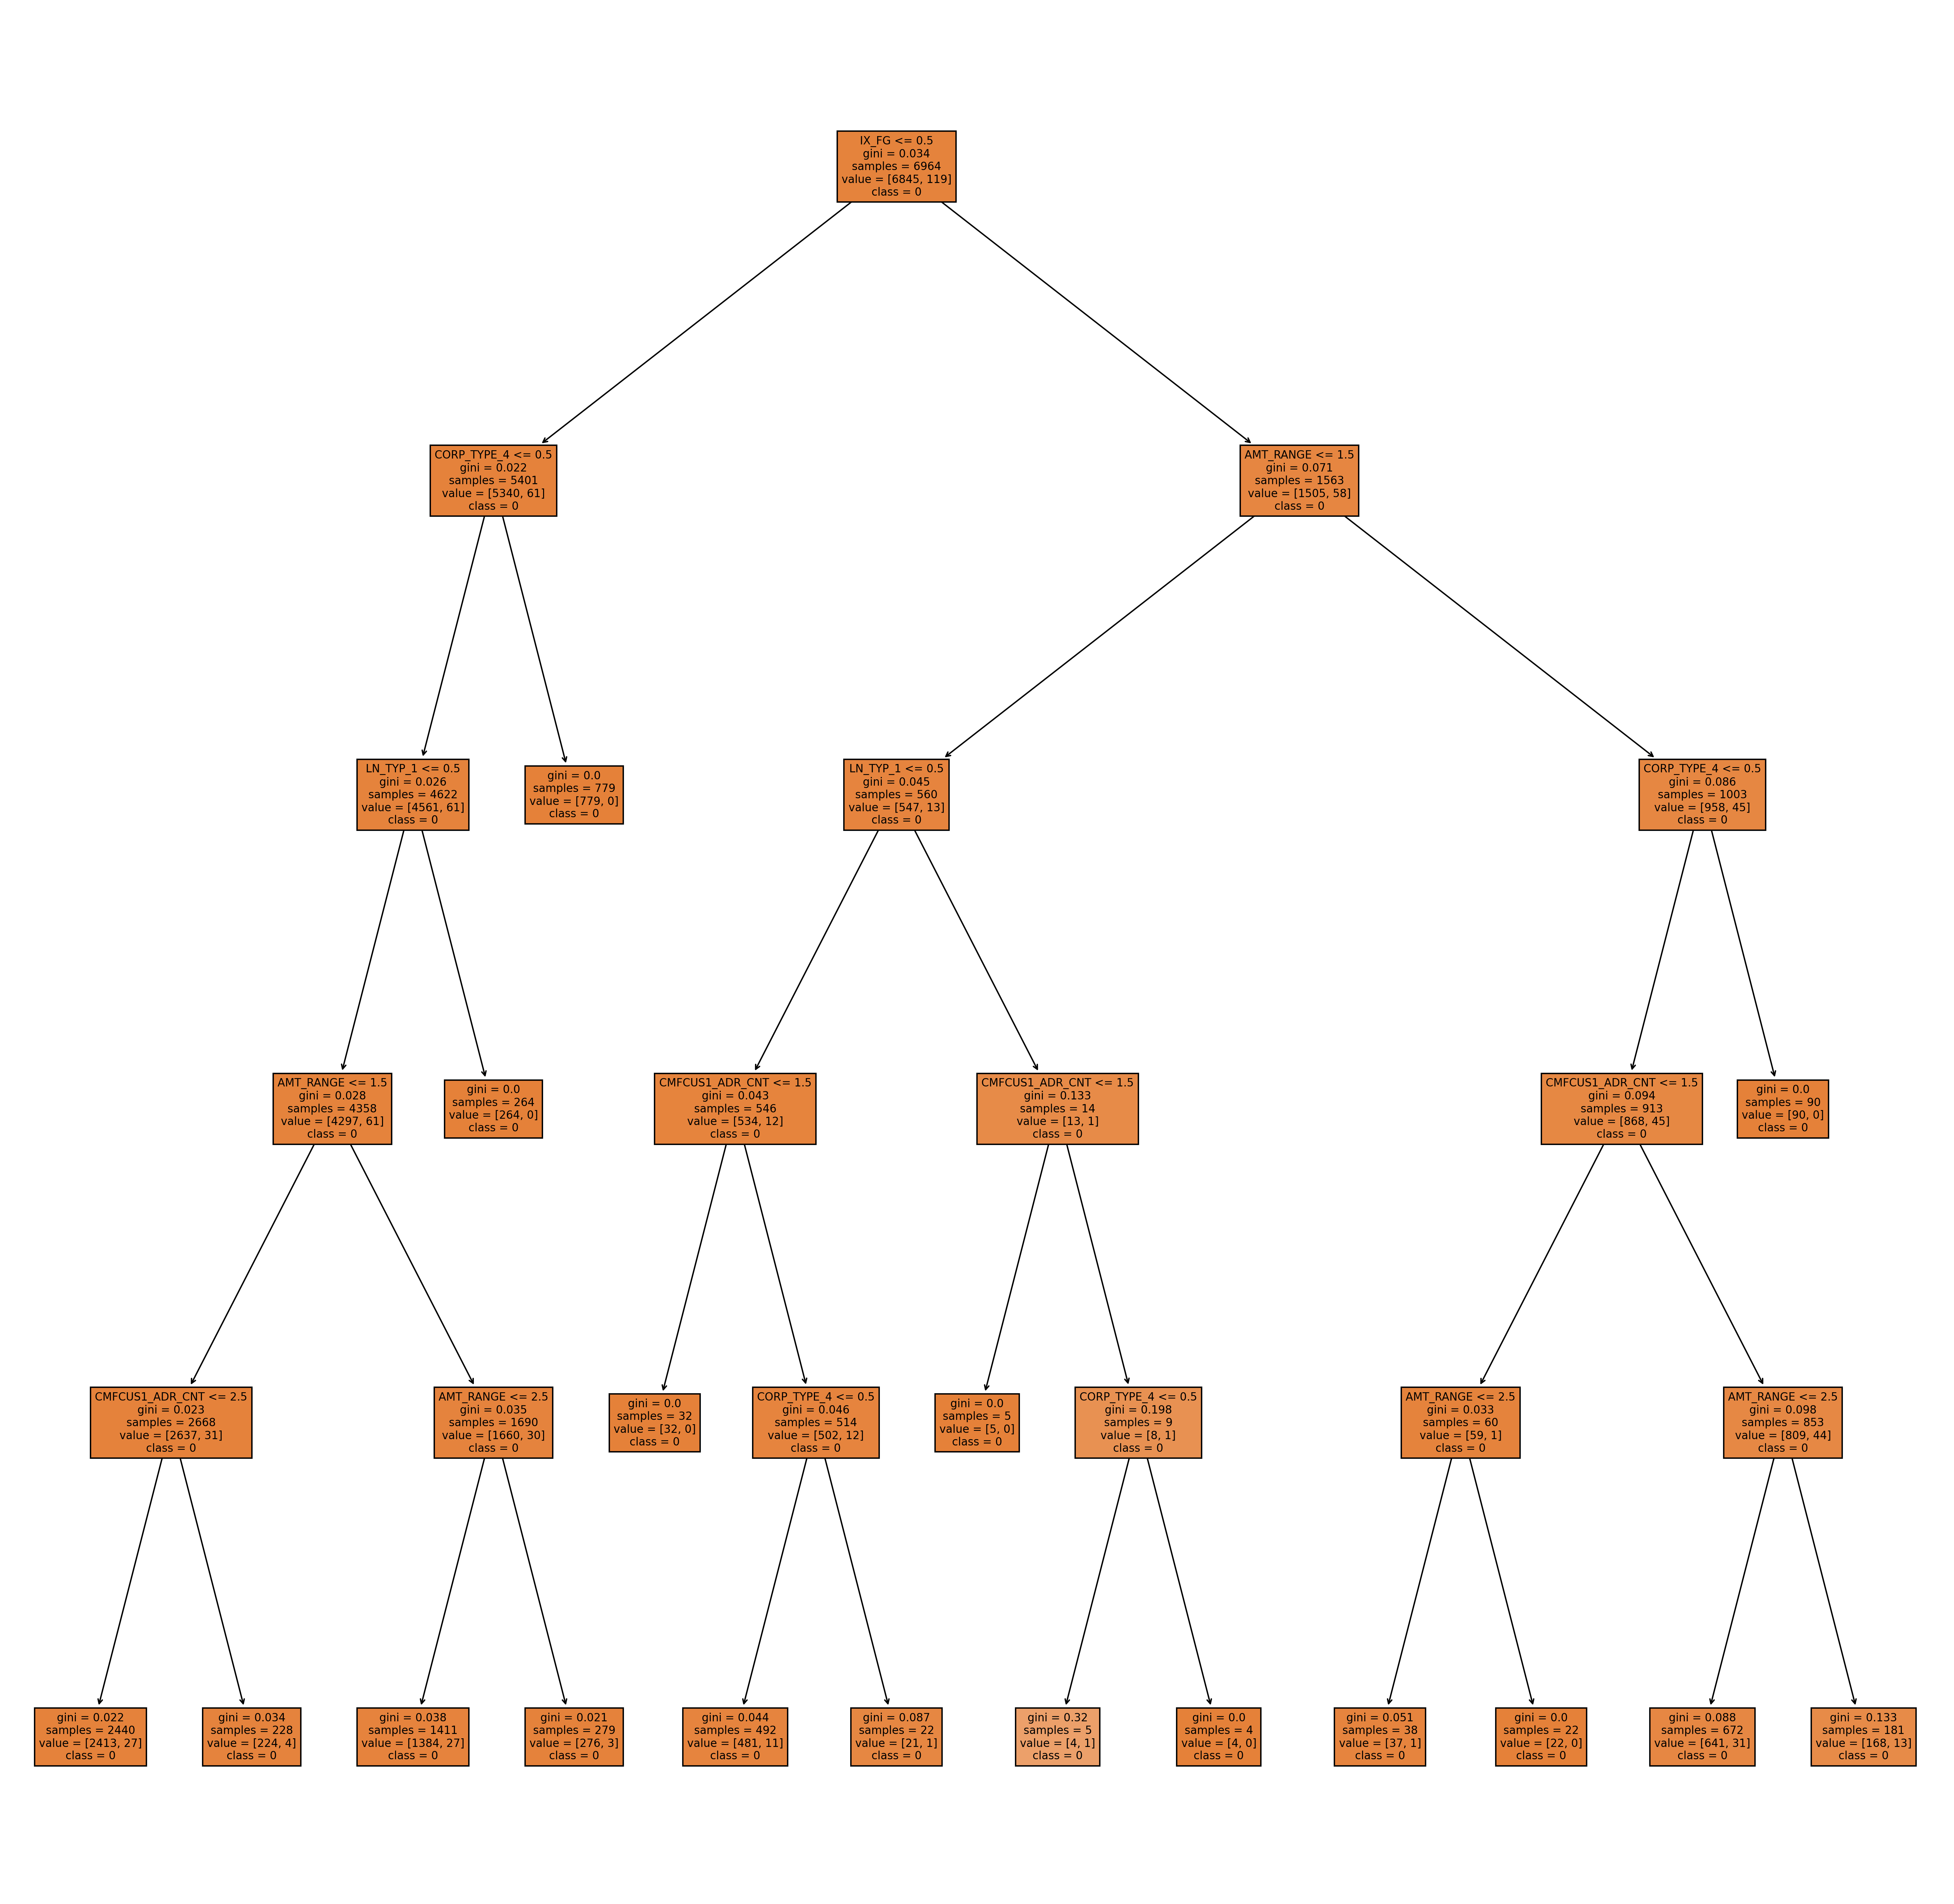

In [37]:
x = df_new[df_new.columns[0:-1]]
y = df_new[df_new.columns[-1]]

from sklearn.model_selection import train_test_split
x_train, x_test1, y_train, y_test1 = train_test_split(x, y, test_size=0.3,random_state=42)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train, y_train)

fn = x.columns
cn = y.unique()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,25), dpi=300)
tree.plot_tree(model,feature_names = fn.astype('str'), class_names=cn.astype('str'), filled = True);
fig.savefig('tree.png')

#分類幾乎無效

In [38]:
y_pred = model.predict(x_test1)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[2922    0]
 [  63    0]]


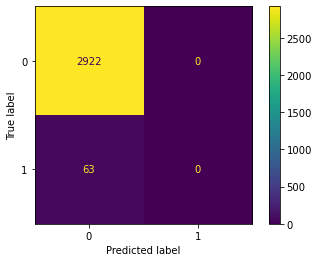

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test1, y_test)  
plt.show()

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2922
           1       0.00      0.00      0.00        63

    accuracy                           0.98      2985
   macro avg       0.49      0.50      0.49      2985
weighted avg       0.96      0.98      0.97      2985



C:\Users\ZE311MT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ZE311MT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ZE311MT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
# Model Trainning: Tree (Screening + Under-Resampling=NM-2)

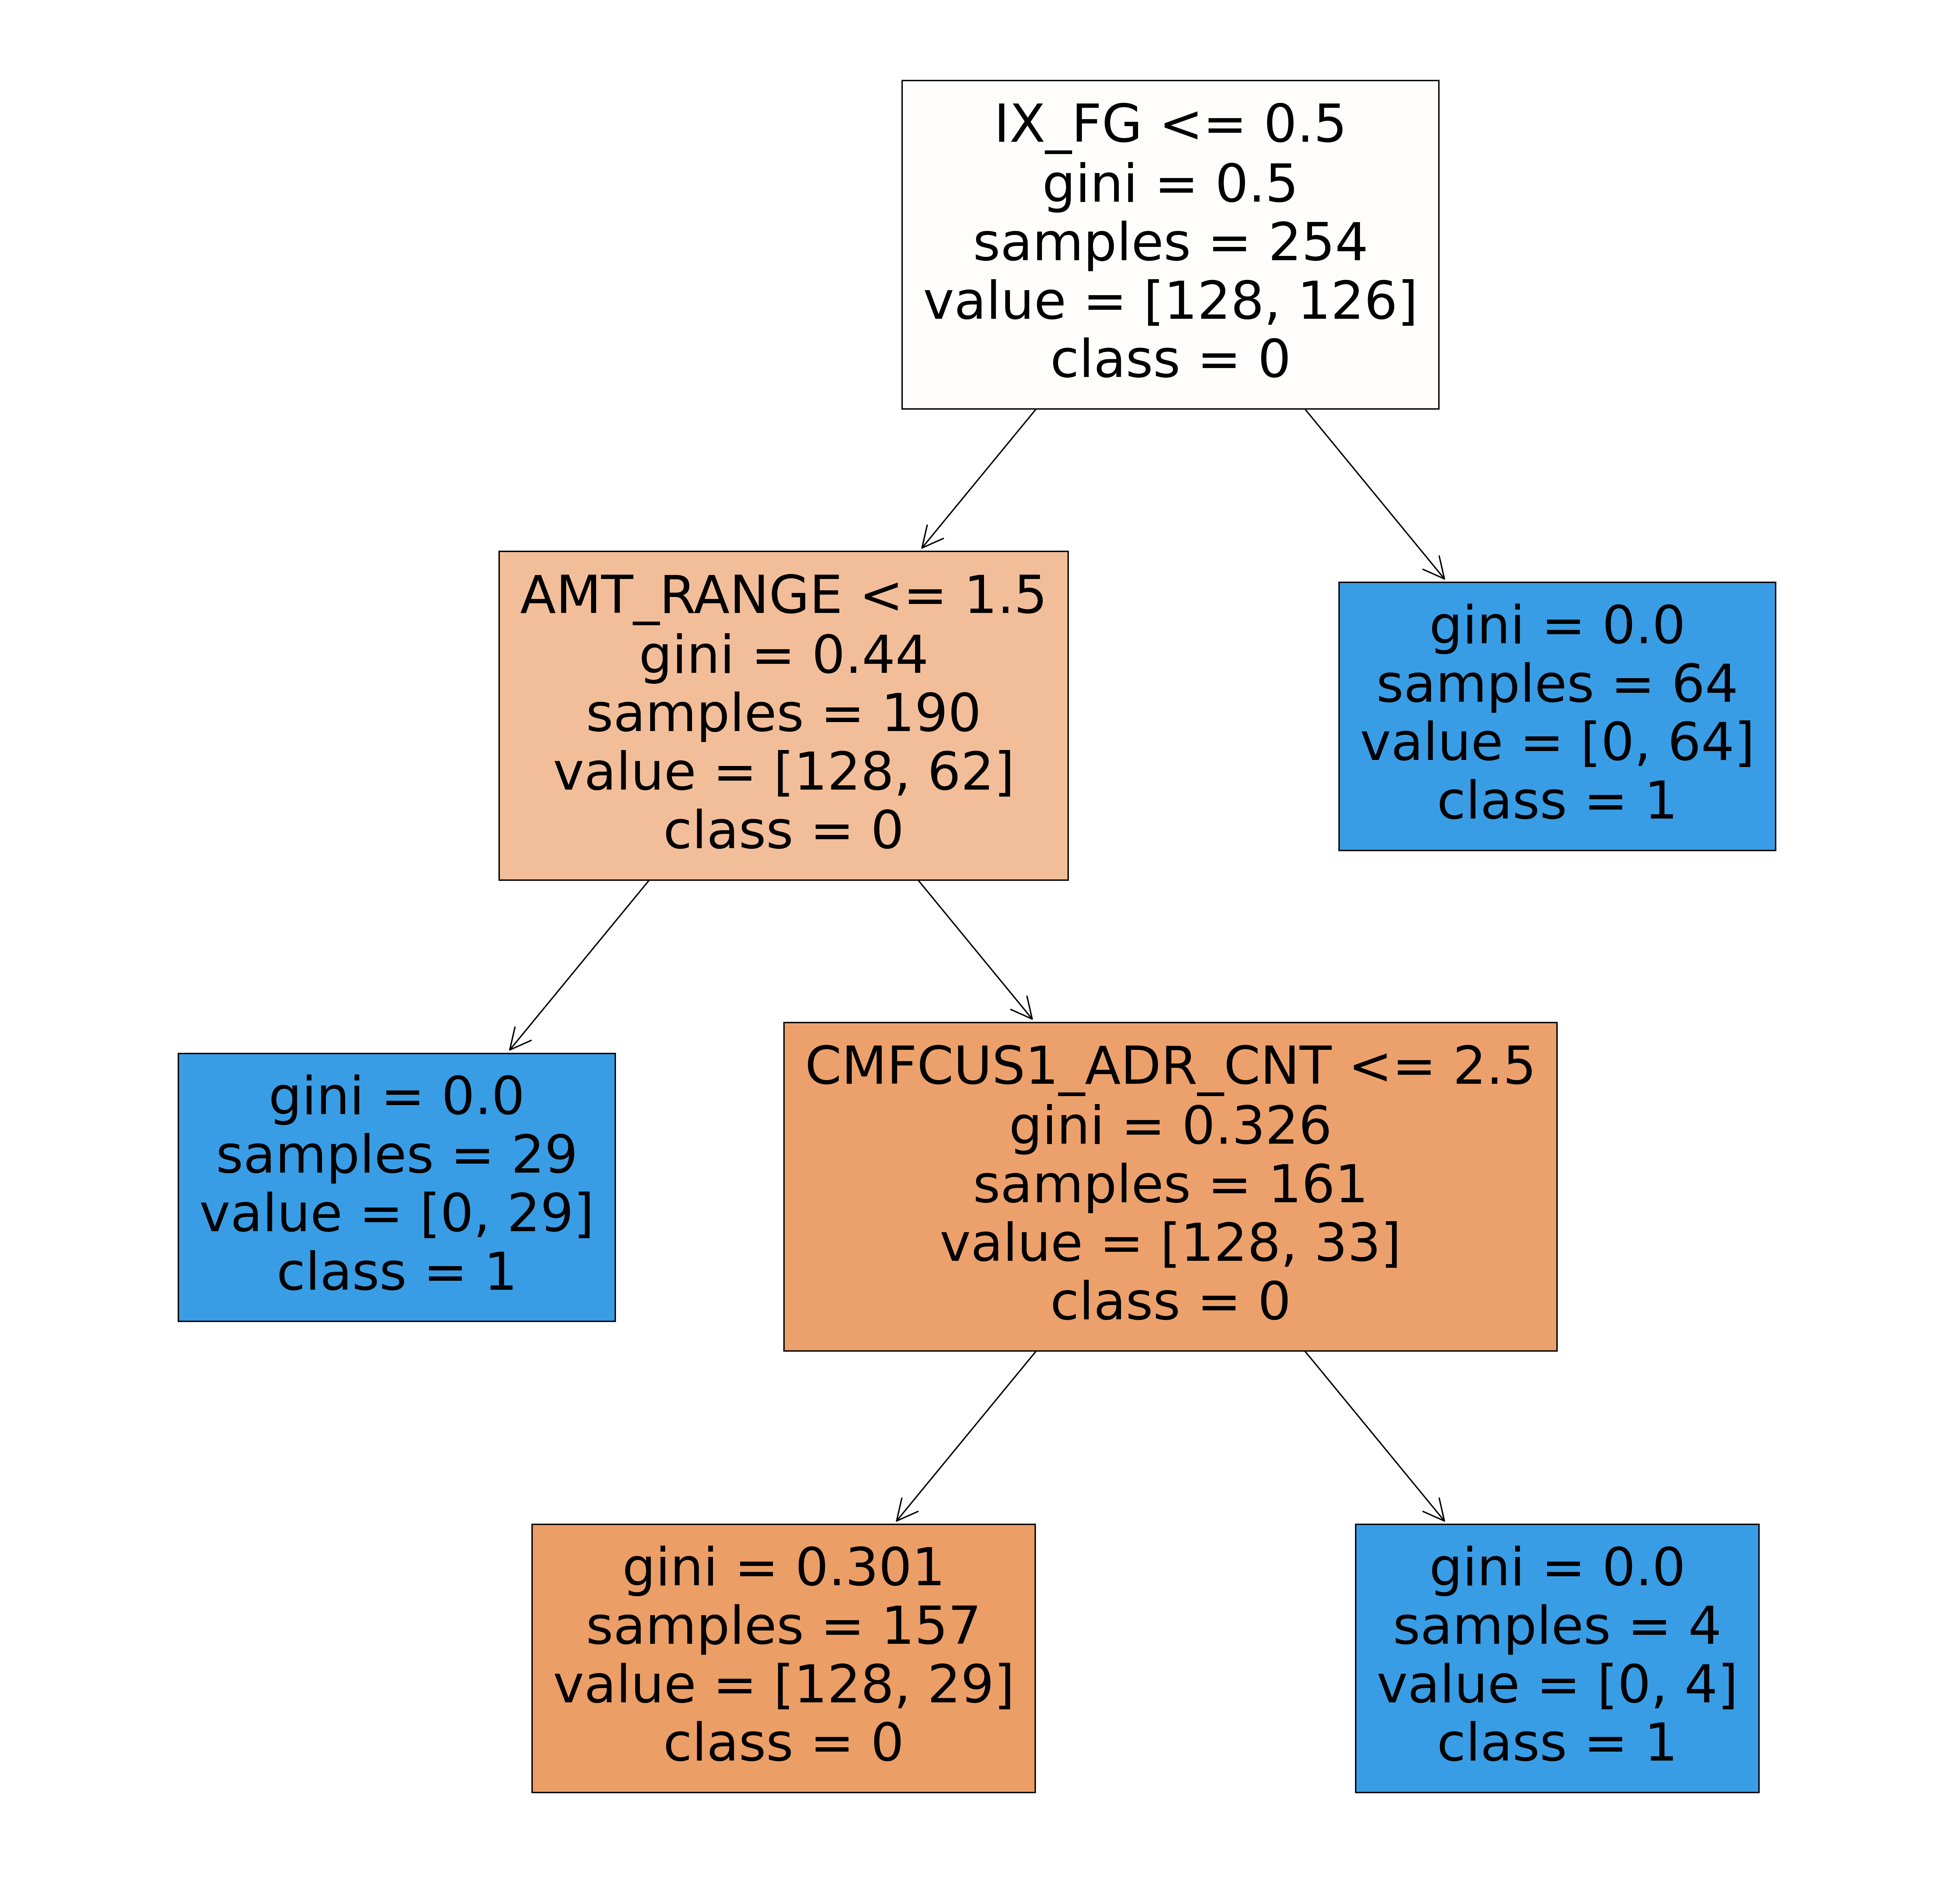

In [41]:
x = NM2_df[NM2_df.columns[0:-1]]
y = NM2_df[NM2_df.columns[-1]]

from sklearn.model_selection import train_test_split
x_train, x_test1, y_train, y_test1 = train_test_split(x, y, test_size=0.3,random_state=42)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

fn = x.columns
cn = y.unique()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,25), dpi=300)
tree.plot_tree(model,feature_names = fn.astype('str'), class_names=cn.astype('str'), filled = True);
fig.savefig('tree.png')

In [42]:
y_pred = model.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 814 2108]
 [  17   46]]


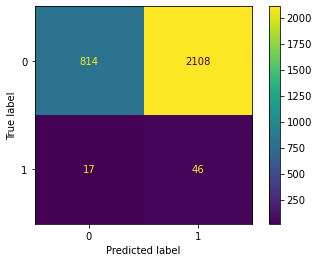

In [43]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)  
plt.show()

#訓練集本身表現很好，但在測試集表現很差

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.28      0.43      2922
           1       0.02      0.73      0.04        63

    accuracy                           0.29      2985
   macro avg       0.50      0.50      0.24      2985
weighted avg       0.96      0.29      0.43      2985



No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.504


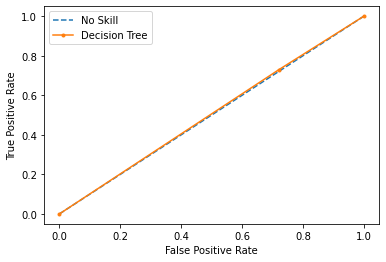

In [45]:
# ROC curve
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Decision Tree: f1=0.041 auc=0.379


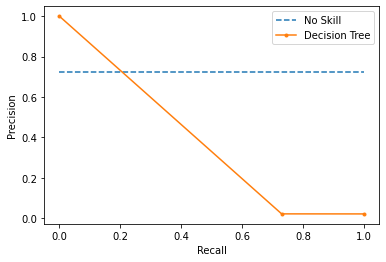

In [46]:
# PR curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Decision Tree: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_pred[y_pred==1]) / len(y_pred)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [55]:
# Model Trainning: Tree (Screening + Upper-Resampling=SMOTE)

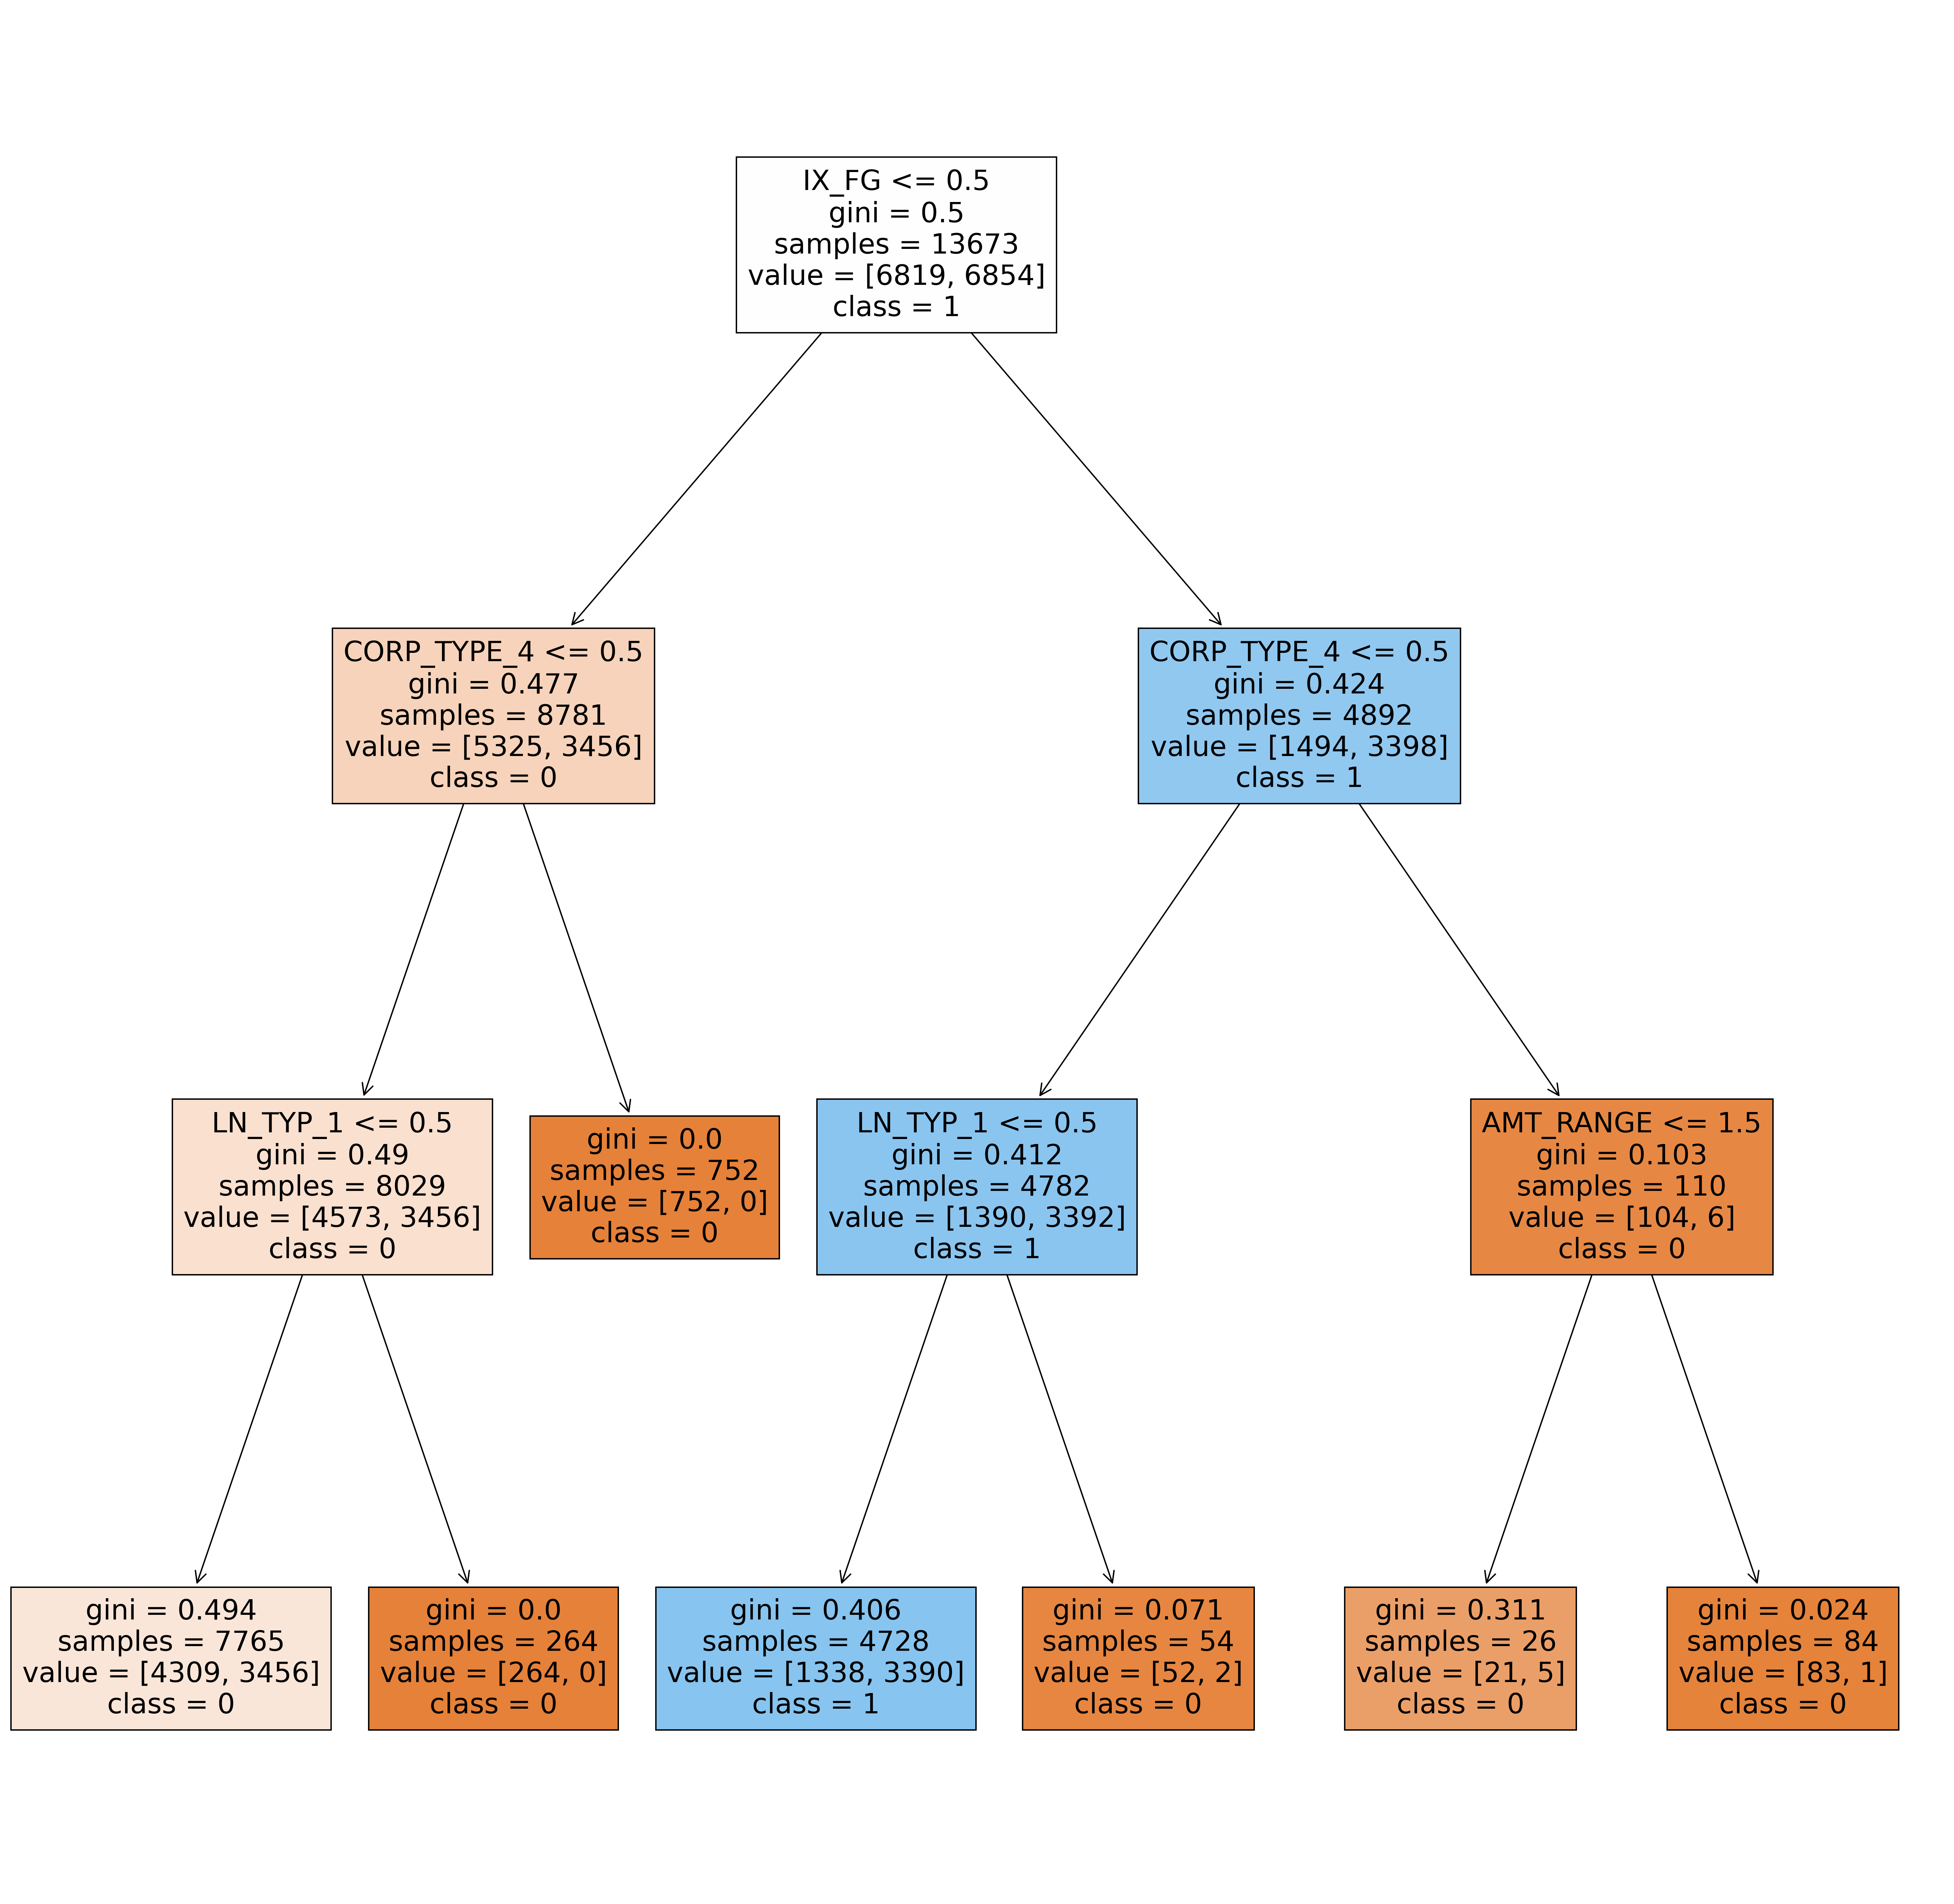

In [47]:
x = SMOTE_df[SMOTE_df.columns[0:-1]]
y = SMOTE_df[SMOTE_df.columns[-1]]

from sklearn.model_selection import train_test_split
x_train, x_test1, y_train, y_test1 = train_test_split(x, y, test_size=0.3,random_state=42)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

fn = x.columns
cn = y.unique()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,25), dpi=300)
tree.plot_tree(model,feature_names = fn.astype('str'), class_names=cn.astype('str'), filled = True);
fig.savefig('tree.png')

In [48]:
y_pred = model.predict(x_test)
print(confusion_matrix(y_test,y_pred))

[[2366  556]
 [  31   32]]


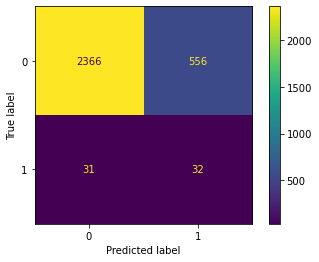

In [49]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)  
plt.show()

#SMOTE+樹表現比NM-2+樹好很多 (但還是爛)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      2922
           1       0.05      0.51      0.10        63

    accuracy                           0.80      2985
   macro avg       0.52      0.66      0.49      2985
weighted avg       0.97      0.80      0.87      2985



No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.696


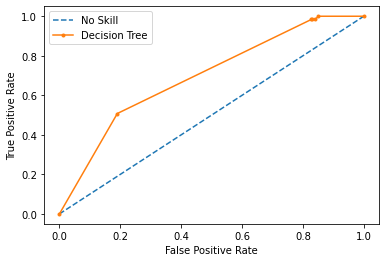

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.098 auc=0.287


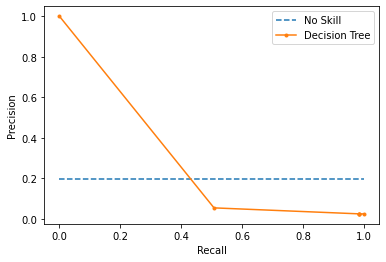

In [52]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_pred[y_pred==1]) / len(y_pred)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [62]:
# Model Trainning: Logistic (Screening + Under-Resampling=NM-2)

In [53]:
x = NM2_df[NM2_df.columns[0:-1]]
y = NM2_df[NM2_df.columns[-1]]

x_train, x_test1, y_train, y_test1 = train_test_split(x, y, test_size=0.3,random_state=42)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.32      0.48      2922
           1       0.02      0.68      0.04        63

    accuracy                           0.33      2985
   macro avg       0.50      0.50      0.26      2985
weighted avg       0.96      0.33      0.47      2985



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.592


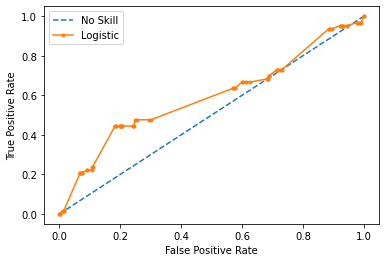

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.041 auc=0.033


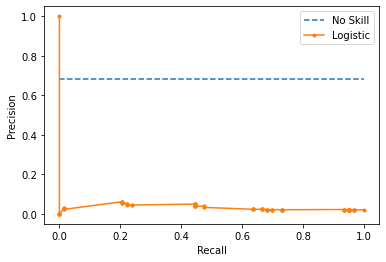

In [55]:
# PR curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_pred[y_pred==1]) / len(y_pred)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [56]:
# Model Trainning: Logistic (Screening + Upper-Resampling=SMOTE)

In [57]:
x = SMOTE_df[SMOTE_df.columns[0:-1]]
y = SMOTE_df[SMOTE_df.columns[-1]]

x_train, x_test1, y_train, y_test1 = train_test_split(x, y, test_size=0.3,random_state=42)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      2922
           1       0.05      0.59      0.09        63

    accuracy                           0.74      2985
   macro avg       0.52      0.66      0.47      2985
weighted avg       0.97      0.74      0.83      2985



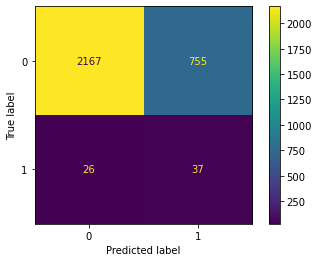

In [58]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)  
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.733


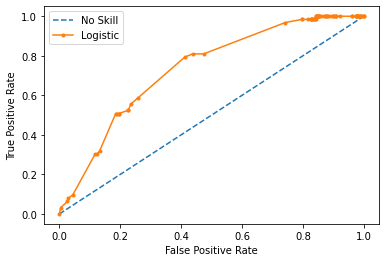

In [59]:
# ROC curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.087 auc=0.063


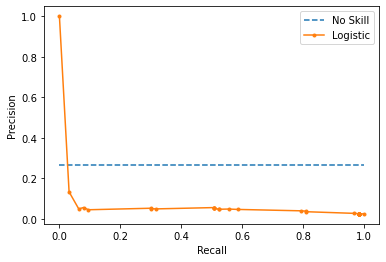

In [60]:
# PR curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_pred[y_pred==1]) / len(y_pred)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [61]:
import statsmodels.api as sm
sm_model = sm.Logit(y_train, sm.add_constant(x_train)).fit()
sm_model.summary()

Optimization terminated successfully.
         Current function value: 0.592986
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    SAR   No. Observations:                13673
Model:                          Logit   Df Residuals:                    13667
Method:                           MLE   Df Model:                            5
Date:                Tue, 04 May 2021   Pseudo R-squ.:                  0.1445
Time:                        09:37:59   Log-Likelihood:                -8107.9
converged:                       True   LL-Null:                       -9477.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9612      0.089    -10.771      0.000      -1.136      -0.786
IX_FG               1.0277      0.041     25.096      0.000       0.947       1.108
AMT_RANGE           0.3422      0.028     12.100      0.000       0.287       0.398
CMFCUS1_ADR_CNT     0.1177      0.041      2.874      0.004       0.037       0.198
LN_TYP_1           -5.2199      0.711     -7.338      0.000      -6.614      -3.826
CORP_TYPE_4        -4.8084      0.412    -11.681      0.000      -5.615      -4.002
===================================================================================
"""

In [71]:
# Model Trainning: KNN (Screening + Upper-Resampling=SMOTE)

In [73]:
x = SMOTE_df[SMOTE_df.columns[0:-1]]
y = SMOTE_df[SMOTE_df.columns[-1]]

x_train, x_test1, y_train, y_test1 = train_test_split(x, y, test_size=0.3,random_state=42)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.55      0.71      2922
           1       0.03      0.65      0.06        63

    accuracy                           0.56      2985
   macro avg       0.51      0.60      0.38      2985
weighted avg       0.97      0.56      0.70      2985



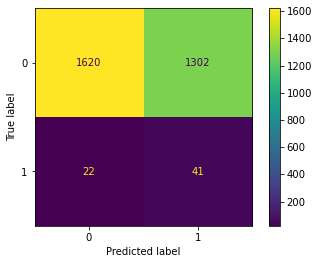

In [74]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)  
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.602


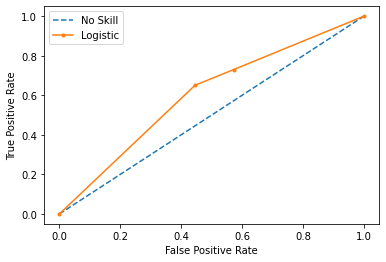

In [75]:
# ROC curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.058 auc=0.344


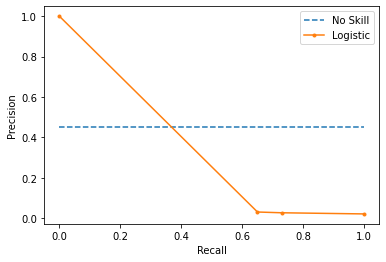

In [76]:
# PR curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_pred[y_pred==1]) / len(y_pred)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
# Model Training: Random scoring come out by Yukai (Screening + Upper-Resampling=SMOTE)

In [98]:
# 生成一與變數相等長度之字典，給予各變數一對應隨機值
# Create a dictionary having specific numbers of keys pair with random values
def RandDict(n):
    for i in range(n):
        values = [random.uniform(-1.0, 1.0) for i in range(n)]
        keys = ['key_' + str(i) for i in range(n)]
        dictionary = dict(zip(keys, values))
    return dictionary

In [99]:
# Test the function
Dict = RandDict(5)
Dict

{'key_0': 0.22387844209097674,
 'key_1': -0.9089989406782923,
 'key_2': -0.35174482959479914,
 'key_3': -0.0038196222760888965,
 'key_4': -0.561471074251465}

In [100]:
Dict['key_0']

0.22387844209097674

In [101]:
SCORE_train_df = SMOTE_df
SCORE_train_df['SCORE'] = 0
SCORE_train_df

,IX_FG,AMT_RANGE,CMFCUS1_ADR_CNT,LN_TYP_1,CORP_TYPE_4,SAR,SCORE
0,0,2,2,0,0,0,0
1,0,2,2,0,1,0,0
2,0,2,2,0,0,0,0
3,0,1,3,0,0,0,0
4,0,1,2,0,0,0,0
...,...,...,...,...,...,...,...
19529,0,0,1,0,0,1,0
19530,0,1,2,0,0,1,0
19531,1,2,2,0,0,1,0
19532,1,2,2,0,0,1,0


In [102]:
# Create a blank list to restore outcomes(F1-score, weights of the slope)
# 生成空串列以儲存結果
outcome = []
beta = [None] * 1000
# 模擬 N 次
for i in range(1000):
    Dict = RandDict(5)
    SCORE_train_df['SCORE'] = SCORE_train_df['SCORE'] + SCORE_train_df['IX_FG']*Dict['key_0']
    SCORE_train_df['SCORE'] = SCORE_train_df['SCORE'] + SCORE_train_df['AMT_RANGE']*Dict['key_1']
    SCORE_train_df['SCORE'] = SCORE_train_df['SCORE'] + SCORE_train_df['CMFCUS1_ADR_CNT']*Dict['key_2']
    SCORE_train_df['SCORE'] = SCORE_train_df['SCORE'] + SCORE_train_df['LN_TYP_1']*Dict['key_3']
    SCORE_train_df['SCORE'] = SCORE_train_df['SCORE'] + SCORE_train_df['CORP_TYPE_4']*Dict['key_4']

    # 分數排序，取與真實 Y 相等數量之預測 Y
    SCORE_train_df = SCORE_train_df.sort_values(by='SCORE',ascending = False).reset_index(drop=True)
    SCORE_train_df['PREDICT'] = 0
    SCORE_train_df.loc[range(0,len(SCORE_train_df[SCORE_train_df['SAR']==1])),'PREDICT'] = 1

    # 結果預測成效
    recall = (len(SCORE_train_df[(SCORE_train_df['SAR']==1) & (SCORE_train_df['PREDICT']==1)]))/len(SCORE_train_df[SCORE_train_df['SAR']==1])
    precision = (len(SCORE_train_df[(SCORE_train_df['SAR']==1) & (SCORE_train_df['PREDICT']==1)]))/len(SCORE_train_df[SCORE_train_df['PREDICT']==1])
    f1_score = 2*precision*recall/(precision+recall)

    # 儲存結果
    outcome.append(f1_score)
    beta[i] = Dict.values()

(array([ 52.,  95., 131.,  68.,   8.,  68., 220., 185., 155.,  18.]),
 array([0.36950957, 0.39687724, 0.42424491, 0.45161257, 0.47898024,
        0.50634791, 0.53371557, 0.56108324, 0.58845091, 0.61581857,
        0.64318624]),
 <BarContainer object of 10 artists>)

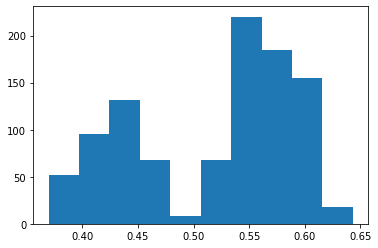

In [103]:
# The distribution of outcomes
# F1-score結果分配
plt.hist(outcome)

In [104]:
# The best outcome
# 最佳結果
max(outcome)

0.6431862393774956

In [105]:
# Find where is the best outcome
outcome.index(max(outcome))

377

In [106]:
# Call the weights of the best outcome, and it would be an useful anchor for our model
# 最佳結果係數
beta[outcome.index(max(outcome))]

dict_values([0.7853916523028255, 0.9191032535803487, -0.9255740752626458, 0.7831307459196895, -0.25861466351533124])

In [107]:
# Feed the best outcome into the model and check the quality of prediction for it
# 代入最佳結果
SCORE_test_df = SMOTE_df
SCORE_test_df['SCORE'] = 0

values = beta[outcome.index(max(outcome))]
keys = ['key_' + str(i) for i in range(5)]
Dict = dict(zip(keys, values))

SCORE_test_df['SCORE'] = SCORE_test_df['SCORE'] + SCORE_test_df['IX_FG']*Dict['key_0']
SCORE_test_df['SCORE'] = SCORE_test_df['SCORE'] + SCORE_test_df['AMT_RANGE']*Dict['key_1']
SCORE_test_df['SCORE'] = SCORE_test_df['SCORE'] + SCORE_test_df['CMFCUS1_ADR_CNT']*Dict['key_2']
SCORE_test_df['SCORE'] = SCORE_test_df['SCORE'] + SCORE_test_df['LN_TYP_1']*Dict['key_3']
SCORE_test_df['SCORE'] = SCORE_test_df['SCORE'] + SCORE_test_df['CORP_TYPE_4']*Dict['key_4']

SCORE_test_df = SCORE_test_df.sort_values(by='SCORE',ascending = False).reset_index(drop=True)
SCORE_test_df['PREDICT'] = 0
SCORE_test_df.loc[range(0,len(SCORE_test_df[SCORE_test_df['SAR']==1])),'PREDICT'] = 1


recall = (len(SCORE_test_df[(SCORE_test_df['SAR']==1) & (SCORE_test_df['PREDICT']==1)]))/len(SCORE_test_df[SCORE_test_df['SAR']==1])
precision = (len(SCORE_test_df[(SCORE_test_df['SAR']==1) & (SCORE_test_df['PREDICT']==1)]))/len(SCORE_test_df[SCORE_test_df['PREDICT']==1])
f1_score = 2*precision*recall/(precision+recall)
    
accuracy = (len(SCORE_test_df[(SCORE_test_df['SAR']==1) & (SCORE_test_df['PREDICT']==1)]) + len(SCORE_test_df[(SCORE_test_df['SAR']==1) & (SCORE_test_df['PREDICT']==0)]))/len(SCORE_test_df) 
recall = (len(SCORE_test_df[(SCORE_test_df['SAR']==1) & (SCORE_test_df['PREDICT']==1)]))/len(SCORE_test_df[SCORE_test_df['SAR']==1])
precision = (len(SCORE_test_df[(SCORE_test_df['SAR']==1) & (SCORE_test_df['PREDICT']==1)]))/len(SCORE_test_df[SCORE_test_df['PREDICT']==1])
f1_score = 2*precision*recall/(precision+recall)

TT_PT = len(SCORE_test_df[(SCORE_test_df['SAR']==1) & (SCORE_test_df['PREDICT']==1)])
TT_PF = len(SCORE_test_df[(SCORE_test_df['SAR']==1) & (SCORE_test_df['PREDICT']==0)])
TF_PF = len(SCORE_test_df[(SCORE_test_df['SAR']==0) & (SCORE_test_df['PREDICT']==0)])
TF_PT = len(SCORE_test_df[(SCORE_test_df['SAR']==0) & (SCORE_test_df['PREDICT']==1)])

In [108]:
## F1 score 不同最佳結果，需要 Debug
print('Accuracy: ', accuracy, 'f1: ', f1_score, 'TT_PT: ', TT_PT, 'TT_PF: ', TT_PF, 'TF_PF: ', TF_PF, 'TF_PT: ', TF_PT)

Accuracy:  0.5 f1:  0.5590252892392751 TT_PT:  5460 TT_PF:  4307 TF_PF:  5460 TF_PT:  4307


In [109]:
print(recall, precision)

0.5590252892392751 0.5590252892392751
